## Create a classification of URLs

For project analyzing the evaluative content of quotes vs. non-quotes.

This notebook reads in the full CBC csv (in "CBC_input") and counts the number of:

* types of things immediately after: http://cbc.ca/ or http://www.cbc.ca/ or https://cbc.ca/ or https://www.cbc.ca/
* then, types of things immediately after that first / but before the last one

For instance, in the first case, we get categories like "books", "news", or "radio":

``` 
http://cbc.ca/books/the-great-beyond-by-léa-murawiec-translated-by-aleshia-jensen-1.6948864
http://www.cbc.ca/news/canada/nova-scotia/hurricane-franklin-powerful-surf-atlantic-canada-1.6950427
http://www.cbc.ca/radio/frontburner/as-fires-burn-n-w-t-s-premier-calls-out-ottawa-1.6951393
https://www.cbc.ca/sports/the-buzzer-newsletter-world-athletics-championships-day-6-preview-1.6945499
https://cbc.ca/radio/asithappens/pink-floyd-brain-scans-1.6939698

```

In the second, we get types of radio programs (as in "frontburner" above), but also types of news and other first-level categories:

```
http://www.cbc.ca/news/climate/northwest-territories-wildfires-1.6939337
https://www.cbc.ca/sports/tennis/tennis-dc-open-handshake-warning-1.6923907

```

In [15]:
import pandas as pd
import numpy as np
import json
from pandas import json_normalize
import ast
from ast import literal_eval
import os
import glob
import re
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'C:\Maite\MOD\projects\Monika_Bednarek\Evaluation_quotes\Data\CBC_input')

## Read original csv

Testing this with August (because it's the shortest), but eventually I want to read `CBC_news_all_2023.csv`

In [3]:
df = pd.read_csv('CBC_news_all_2023.csv', encoding = 'utf8')

In [4]:
df

,id,url,body,title
0,63b0d066f642cd4562ec7be5,https://www.cbc.ca/sports/hockey/nhl/montreal-...,Alex Ovechkin recorded his 30th career hat tri...,Capitals' offence explodes for 9 goals to send...
1,63b0d065f642cd4562ec7bd0,https://www.cbc.ca/news/world/north-korea-incr...,North Korean leader Kim Jong-un vowed to incre...,Kim Jong-un vows to 'exponentially' increase N...
2,63b0eb8bf642cd4562ed022d,https://www.cbc.ca/news/canada/british-columbi...,Starting Monday Translink will modify 45 bus r...,Translink is changing service on 45 bus routes...
3,63b0f31df642cd4562ed34cc,https://www.cbc.ca/sports/hockey/canada-sweden...,Connor Bedard had four assists to tie Eric Lin...,Canada tops Sweden at men's world juniors to s...
4,63b0faa9f642cd4562ed62b4,https://www.cbc.ca/sports/hockey/nhl/ottawa-se...,"Lucas Raymond had a goal and an assist, and th...",Red Wings score 4 unanswered goals to rally pa...
...,...,...,...,...
52320,6591e7ed58b434ef00c2bf9c,https://www.cbc.ca/news/world/israel-siblings-...,Israeli Maya Regev lay badly wounded in a nond...,Israeli siblings freed from Hamas describe pas...
52321,6591e87458b434ef00c2c26f,https://www.cbc.ca/sports/football/nfl/philade...,James Conner ran for a two-yard touchdown with...,Canadian rookie Sydney Brown returns intercept...
52322,6591f60658b434ef00c3239c,http://www.cbc.ca/news/world/israel-hamas-war-...,Israeli strikes in central Gaza killed at leas...,Israeli strikes in central Gaza kill at least ...
52323,6591f6b158b434ef00c32999,https://www.cbc.ca/news/canada/manitoba/jets-m...,Rutger McGroarty was desperate to play for his...,Jets prospect McGroarty savouring 2nd world ju...


In [5]:
n_all = len(df)
n_all

52325

## Extract the right information


### First segment only, i.e., the stuff right after "cbc.ca"

In [6]:
df['first_segment'] = df['url'].str.extract(r'cbc\.ca/([^/]+)')

# Count occurrences of each unique segment
segment_counts = df['first_segment'].value_counts()

# Display the counts
print("Counts for the first segment:\n", df['first_segment'].value_counts())

Counts for the first segment:
 news                                    44423
sports                                   4124
radio                                    1435
arts                                      824
books                                     516
music                                     278
life                                      228
kidsnews                                  147
television                                136
documentaries                             118
archives                                   39
newsletter_static                          20
comedy                                     16
media                                       8
the-last-black-man-in-san-francisco         2
jamie-and-jimmys-food-fight-club            2
backlash-misogyny-in-the-digital-age        2
surfing-the-menu-the-next-generation        1
indspire                                    1
red-bull-bc-one-cypher-canada               1
canadaday                                   1
jam

In [8]:
# Count occurrences of each unique first segment
first_segment_counts = df['first_segment'].value_counts()

# Calculate the total count
first_total_counts = first_segment_counts.sum()

print("\nTotal count across all first segments:", first_total_counts)


Total count across all first segments: 52325


Check that this count is the same as `n_all`

In [9]:
n_all

52325

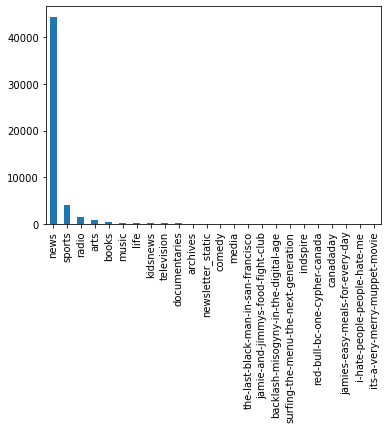

In [16]:
df['first_segment'].value_counts().plot(kind='bar') 
plt.show() 

### Last segment, i.e., right before final slash

In [10]:
df['last_segment'] = df['url'].str.extract(r'cbc\.ca/[^/]+/([^/]+)')

# Count occurrences of each unique second segment
last_segment_counts = df['last_segment'].value_counts()

# Display the counts
print("\nCounts for the last segment:\n", last_segment_counts)


Counts for the last segment:
 canada                                                                                                    38504
world                                                                                                      2054
politics                                                                                                   1694
olympics                                                                                                    918
hockey                                                                                                      882
                                                                                                          ...  
the-song-that-called-them-home-by-david-a-robertson-illustrated-by-maya-mckibbin-1.6816003                    1
the-buzzer-newsletter-marathon-goat-eliud-kpchoge-1.6815840                                                   1
sarah-polley-brandi-morin-saeed-teebi-shortlisted-for-10k-rakuten-kobo-em

In [11]:
# Count occurrences of each unique last segment
last_segment_counts = df['last_segment'].value_counts()

# Calculate the total count
last_total_counts = last_segment_counts.sum()

print("\nTotal count across all last segments:", last_total_counts)


Total count across all last segments: 52313


Check that this count is the same as `n_all`

In [12]:
n_all

52325

In [18]:
last_segment_counts.to_csv('URL_last_segment.csv')

### Check whether all last segment stuff is just news

In [13]:
# Filter the DataFrame where the first_segment is 'news'
news_df = df[df['first_segment'] == 'news']

# Count occurrences of the last_segment for the 'news' first segment
news_last_segment_counts = news_df['last_segment'].value_counts()

# Print the results
print("Counts of the last segment for 'news':\n", news_last_segment_counts)

Counts of the last segment for 'news':
 canada                                                   38504
world                                                     2054
politics                                                  1694
business                                                   648
entertainment                                              541
                                                         ...  
ukraine-russia-counteroffensive-summer-1.6895765             1
social-media-advertising-federal-government-1.6899347        1
wage-theft-ontario-workers-1.6913090                         1
hunter-biden-explainer-1.6928591                             1
israel-hamas-war-day-79-1.7069133                            1
Name: last_segment, Length: 77, dtype: int64


In [14]:
# Count occurrences of each unique last segment after news
news_last_segment_counts = df['last_segment'].value_counts()

# Calculate the total count
news_last_total_counts = news_last_segment_counts.sum()

print("\nTotal count of news last segments:", news_last_total_counts)


Total count of news last segments: 52313


In [19]:
news_last_segment_counts.to_csv('URL_news_last_segment.csv')

### Not sure the above works
Trying something else

In [20]:
# Filter the DataFrame where the first_segment is 'news'
news_df = df[df['first_segment'] == 'news']

In [21]:
news_df

,id,url,body,title,first_segment,last_segment
1,63b0d065f642cd4562ec7bd0,https://www.cbc.ca/news/world/north-korea-incr...,North Korean leader Kim Jong-un vowed to incre...,Kim Jong-un vows to 'exponentially' increase N...,news,world
2,63b0eb8bf642cd4562ed022d,https://www.cbc.ca/news/canada/british-columbi...,Starting Monday Translink will modify 45 bus r...,Translink is changing service on 45 bus routes...,news,canada
5,63b1167cf642cd4562ee1392,http://www.cbc.ca/news/canada/british-columbia...,Police in Victoria are looking for more potent...,Man arrested after Victoria assaults where wom...,news,canada
10,63b14edcf642cd4562efb0e7,https://www.cbc.ca/news/canada/toronto/bus-com...,"With the main competitor out of the way, bus c...",Is the bus back? Why these companies are betti...,news,canada
11,63b14edff642cd4562efb136,https://www.cbc.ca/news/canada/montreal/quebec...,Quebecers are increasingly streaming music onl...,Quebecers are listening to less local music; a...,news,canada
...,...,...,...,...,...,...
52318,6591d9f058b434ef00c268bb,https://www.cbc.ca/news/canada/prince-edward-i...,Edward Lambert remembers attending a New Year'...,Kensington café spreading the love with 'queer...,news,canada
52320,6591e7ed58b434ef00c2bf9c,https://www.cbc.ca/news/world/israel-siblings-...,Israeli Maya Regev lay badly wounded in a nond...,Israeli siblings freed from Hamas describe pas...,news,world
52322,6591f60658b434ef00c3239c,http://www.cbc.ca/news/world/israel-hamas-war-...,Israeli strikes in central Gaza killed at leas...,Israeli strikes in central Gaza kill at least ...,news,world
52323,6591f6b158b434ef00c32999,https://www.cbc.ca/news/canada/manitoba/jets-m...,Rutger McGroarty was desperate to play for his...,Jets prospect McGroarty savouring 2nd world ju...,news,canada


In [22]:
news_df['news_type'] = news_df['url'].str.extract(r'cbc\.ca/news/([^/]+)')

# Count occurrences of each unique segment
news_counts = news_df['news_type'].value_counts()

# Display the counts
print("Counts for the first news segment:\n", news_df['news_type'].value_counts())

Counts for the first news segment:
 canada                                                   38504
world                                                     2054
politics                                                  1694
business                                                   648
entertainment                                              541
                                                         ...  
ukraine-russia-counteroffensive-summer-1.6895765             1
social-media-advertising-federal-government-1.6899347        1
wage-theft-ontario-workers-1.6913090                         1
hunter-biden-explainer-1.6928591                             1
israel-hamas-war-day-79-1.7069133                            1
Name: news_type, Length: 77, dtype: int64


C:\Users\mtaboada\AppData\Local\Temp/ipykernel_27320/242458718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['news_type'] = news_df['url'].str.extract(r'cbc\.ca/news/([^/]+)')


In [23]:
news_counts

canada                                                   38504
world                                                     2054
politics                                                  1694
business                                                   648
entertainment                                              541
                                                         ...  
ukraine-russia-counteroffensive-summer-1.6895765             1
social-media-advertising-federal-government-1.6899347        1
wage-theft-ontario-workers-1.6913090                         1
hunter-biden-explainer-1.6928591                             1
israel-hamas-war-day-79-1.7069133                            1
Name: news_type, Length: 77, dtype: int64

In [24]:
news_counts.to_csv('URL_news_types.csv')

### Further, what types under 'canada'

In [26]:
news_df

,id,url,body,title,first_segment,last_segment,news_type
1,63b0d065f642cd4562ec7bd0,https://www.cbc.ca/news/world/north-korea-incr...,North Korean leader Kim Jong-un vowed to incre...,Kim Jong-un vows to 'exponentially' increase N...,news,world,world
2,63b0eb8bf642cd4562ed022d,https://www.cbc.ca/news/canada/british-columbi...,Starting Monday Translink will modify 45 bus r...,Translink is changing service on 45 bus routes...,news,canada,canada
5,63b1167cf642cd4562ee1392,http://www.cbc.ca/news/canada/british-columbia...,Police in Victoria are looking for more potent...,Man arrested after Victoria assaults where wom...,news,canada,canada
10,63b14edcf642cd4562efb0e7,https://www.cbc.ca/news/canada/toronto/bus-com...,"With the main competitor out of the way, bus c...",Is the bus back? Why these companies are betti...,news,canada,canada
11,63b14edff642cd4562efb136,https://www.cbc.ca/news/canada/montreal/quebec...,Quebecers are increasingly streaming music onl...,Quebecers are listening to less local music; a...,news,canada,canada
...,...,...,...,...,...,...,...
52318,6591d9f058b434ef00c268bb,https://www.cbc.ca/news/canada/prince-edward-i...,Edward Lambert remembers attending a New Year'...,Kensington café spreading the love with 'queer...,news,canada,canada
52320,6591e7ed58b434ef00c2bf9c,https://www.cbc.ca/news/world/israel-siblings-...,Israeli Maya Regev lay badly wounded in a nond...,Israeli siblings freed from Hamas describe pas...,news,world,world
52322,6591f60658b434ef00c3239c,http://www.cbc.ca/news/world/israel-hamas-war-...,Israeli strikes in central Gaza killed at leas...,Israeli strikes in central Gaza kill at least ...,news,world,world
52323,6591f6b158b434ef00c32999,https://www.cbc.ca/news/canada/manitoba/jets-m...,Rutger McGroarty was desperate to play for his...,Jets prospect McGroarty savouring 2nd world ju...,news,canada,canada


In [28]:
news_canada_df = news_df[news_df['news_type'] == 'canada']

In [32]:
news_canada_df['news_canada_type'] = news_canada_df['url'].str.extract(r'cbc\.ca/news/canada/([^/]+)')

# Count occurrences of each unique segment
news_canada_counts = news_canada_df['news_canada_type'].value_counts()

# Display the counts
print("Counts for the first news canada segment:\n", news_canada_df['news_canada_type'].value_counts())

Counts for the first news canada segment:
 british-columbia                                                                                  3920
manitoba                                                                                          3542
nova-scotia                                                                                       2864
toronto                                                                                           2502
ottawa                                                                                            2391
                                                                                                  ... 
am-i-still-a-mother-if-my-newborn-died-1.6822059                                                     1
our-baby-girls-were-born-5-months-apart-after-we-suffered-with-infertility-for-years-1.6822095       1
stanley-cup-canada-chart-1.6820519                                                                   1
king-charles-coronation-viewin

C:\Users\mtaboada\AppData\Local\Temp/ipykernel_27320/4269701876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_canada_df['news_canada_type'] = news_canada_df['url'].str.extract(r'cbc\.ca/news/canada/([^/]+)')


In [33]:
news_canada_counts.to_csv('URL_news_canada.csv')

### Just checking what's under PEI, the province with the smallest number of articles

In [36]:
news_pei_df = news_canada_df[news_canada_df['news_canada_type'] == 'prince-edward-island']

In [37]:
news_pei_df

,id,url,body,title,first_segment,last_segment,news_type,news_canada_type
41,63b1d4a0f642cd4562f31f0e,https://www.cbc.ca/news/canada/prince-edward-i...,Haley Zavo always dreamed of creating a vibran...,Kings Playhouse executive director exits stage...,news,canada,canada,prince-edward-island
82,63b2ae78f642cd4562f87fc6,https://www.cbc.ca/news/canada/prince-edward-i...,Canadian Blood Services is urging people on Pr...,Canadian Blood Services urges Islanders to boo...,news,canada,canada,prince-edward-island
90,63b2c3aef642cd4562f933e3,https://www.cbc.ca/news/canada/prince-edward-i...,"The police cruiser, a century-old symbol of po...","Cruisers out, SUVs in as Charlottetown renews ...",news,canada,canada,prince-edward-island
104,63b30298f642cd4562fad8a9,https://www.cbc.ca/news/canada/prince-edward-i...,It's been a long year for Buddy the eagle at C...,"Eagle, recovered from spinal surgery, heading ...",news,canada,canada,prince-edward-island
152,63b36492f642cd4562fd297a,https://www.cbc.ca/news/canada/prince-edward-i...,Some members of P.E.I.'s Chinese community hav...,"As China eases COVID-19 restrictions, some peo...",news,canada,canada,prince-edward-island
...,...,...,...,...,...,...,...,...
52241,6590334558b434ef00b69058,https://www.cbc.ca/news/canada/prince-edward-i...,The emergency department at Western Hospital i...,"Alberton ER closed for weekend, other hospital...",news,canada,canada,prince-edward-island
52284,65913e9658b434ef00be0a3a,https://www.cbc.ca/news/canada/prince-edward-i...,Many P.E.I. businesses and services will be cl...,New Year's Eve and New Year's Day: What's open...,news,canada,canada,prince-edward-island
52286,65913f1358b434ef00be0fd2,https://www.cbc.ca/news/canada/prince-edward-i...,A provincial election. A scathing report detai...,A look back at the stories that shaped Prince ...,news,canada,canada,prince-edward-island
52300,659199ab58b434ef00c0a0e4,https://www.cbc.ca/news/canada/prince-edward-i...,Tennis P.E.I. is searching for a new home cour...,"After 43 years, it's game, set, match for tenn...",news,canada,canada,prince-edward-island


In [39]:
news_pei_df.to_csv('URL_news_pei.csv')